In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# dataset loading

df=pd.read_csv('D:\Data Science IITB\Project on HR Analytics/Recruitment_data.csv')
pd.set_option('display.max_columns',None)
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [23]:
##Converts the Sales into the Percentage from 100
df['sales_quota_pct']= df['sales_quota_pct']*100
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,10881.90157,Applied Online
1,0,3,23941.72623,Other Source
2,1,2,4975.30207,Campus
3,0,2,25139.57731,Other Source
4,0,3,14247.88765,Applied Online


In [4]:
#check the shape of the dataframe (application_data)
df.shape

(446, 4)

In [5]:
##check data types of the columns:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.dtypes

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [6]:
##checking missing values
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
100*df.isnull().mean()

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

In [7]:
## fill missing values with 'other source'
df['recruiting_source']= df['recruiting_source'].fillna('Other Source')

In [24]:
df.head(10)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,10881.90157,Applied Online
1,0,3,23941.72623,Other Source
2,1,2,4975.30207,Campus
3,0,2,25139.57731,Other Source
4,0,3,14247.88765,Applied Online
5,1,3,5481.23240,Referral
6,1,3,7942.13479,Applied Online
7,0,2,10065.24423,Referral
8,0,3,15199.17288,Campus
9,0,3,20735.27866,Other Source


In [9]:
##now again check the missing values
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
100*df.isnull().mean()

attrition             0.0
performance_rating    0.0
sales_quota_pct       0.0
recruiting_source     0.0
dtype: float64

In [10]:
##Segmentation

In [11]:
df.shape

(446, 4)

In [12]:
df.nunique()

attrition               2
performance_rating      5
sales_quota_pct       446
recruiting_source       5
dtype: int64

In [13]:
sls= df.groupby(by='recruiting_source')['sales_quota_pct'].mean()
sls

recruiting_source
Applied Online    105.859019
Campus             90.803541
Other Source      116.810914
Referral          102.319817
Search Firm        88.696032
Name: sales_quota_pct, dtype: float64

In [14]:
attr= df.groupby(by=['recruiting_source','attrition']).size()
attr

recruiting_source  attrition
Applied Online     0             98
                   1             32
Campus             0             40
                   1             16
Other Source       0            178
                   1             27
Referral           0             30
                   1             15
Search Firm        0              5
                   1              5
dtype: int64

In [15]:
#average of attrition
avg_attrition=attr.sum()/446
print(avg_attrition)

1.0


In [16]:
#average of sales
avg_sales=sls.sum()/5
print(avg_sales)

100.89786455192714


#  Histogram

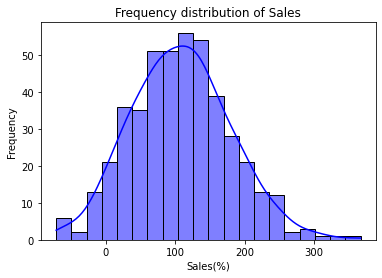

In [17]:
sns.histplot(df['sales_quota_pct'],bins=20,kde='True', color='blue')
plt.title('Frequency distribution of Sales')
plt.xlabel('Sales(%)')
plt.ylabel('Frequency')
plt.show()

### *The histogram is useful for visualizing the distribution of a numerical variable. It can help us identify patterns such as the shape of the distribution, the presence of outliers, and the central tendency of the data.
### *The histogram shows the distribution of sales given by employees. From the plot, we can see that the majority of employees gave sales between 80% and 140%.

#  Boxplot (One variable)

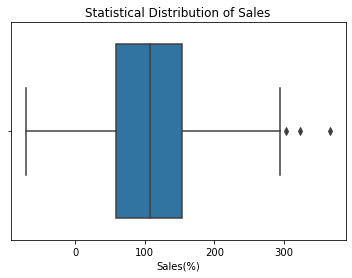

In [18]:
sns.boxplot(df['sales_quota_pct'])
plt.xlabel('Sales(%)')
plt.title('Statistical Distribution of Sales')
plt.show()

### *The box plot is useful for comparing the distribution of a numerical variable between different groups. It can help us identify differences in the central tendency, spread, and outliers between groups.
### *The box plot shows the distribution of the sales We can see that the maximum is occured between the 80%and 140%. Additionally, there are some outliers after 300%.

#  Pie Chart

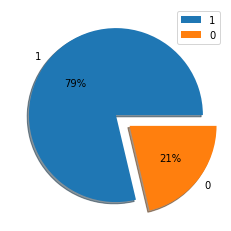

In [19]:
val= df['attrition'].unique()
dist= list(100*df['attrition'].value_counts(normalize=True))
exp=[0,0.2]
plt.pie(dist,labels=val,autopct='%0.f%%',explode=exp,shadow=True)
plt.legend()
plt.show()

### *The pie chart gives you additional information about the percentage presence of each category in data means which category is getting how much weightage in data.
### *The pie chart shows the percentage presence of 0 & 1, as we know 0 indicates that employee didn't leave or resign the job and as we also know 1 indicates that employee leave or resign the job. This pie chart shows that number of employees which leave or resign the job is 79% and number of employees which didn't leave or resign the job is 21%.

#  Bar Plot

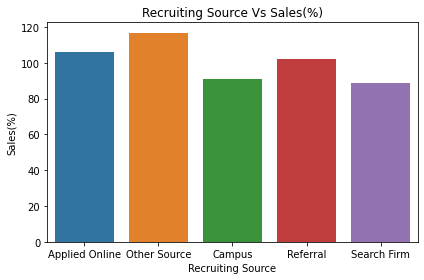

In [20]:
sns.barplot(df['recruiting_source'],df['sales_quota_pct'],ci=None)
plt.xlabel('Recruiting Source')
plt.ylabel('Sales(%)')
plt.title('Recruiting Source Vs Sales(%)')
plt.tight_layout()
plt.show()

### *The bar plot is useful for comparing the average value of a numerical variable between different groups. It can help us identify differences in the central tendency between groups.
### *The bar plot shows the average sales(%) for each of the recruiting source. We can see that 'other source' recruiting source has achieved the highest average sales(%) and 'search firm' has achieved the lowest sales(%).

# Boxplot (Two variables)

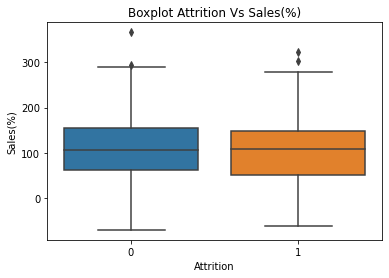

In [21]:
sns.boxplot(df['attrition'],df['sales_quota_pct'])
plt.xlabel('Attrition')
plt.ylabel('Sales(%)')
plt.title('Boxplot Attrition Vs Sales(%)')
plt.show()

### *Box plot is a nice way of viewing some statical values along with relationship between two values.
### *Here, Box plot shows that Attrition(0) i.e, number of employees who have quit or resigned the Job is achieved  the highest Sales(%) and Attrition(1) i.e, number of employees who haven't quit or resigned the Job is achieved the less Sales than the Attrition(0).